<h1><center> SCC 0270 - Redes Neurais 
 </center></h1>
 
<h3><center>
 Profa. Dra. Roseli Aparecida Francelin Romero
</h3><center>
    
   
<h1><center> Exercício 05 - Redes Convolucionais e keras
 </center></h1>
 
<h3><center>
Bruno Gomes Coelho - 9791160
</h3><center>

# Introdução

Este trabalho analisa o uso de uma rede convolucional para a classificação de imagens do CIFAR-10 utilizando a biblioteca Keras.

O conjunto de dados CIFAR-10 (Instituto Canadense de Pesquisa Avançada) é uma coleção de imagens comumente usadas para treinar algoritmos de aprendizado de máquina e visão computacional. É um dos conjuntos de dados mais amplamente utilizados na pesquisa de aprendizado de máquina. Ele contém 60.000 imagens coloridas de 32x32 em 10 classes diferentes. As 10 classes diferentes representam aviões, carros, pássaros, gatos, veados, cães, sapos, cavalos, navios e caminhões. Existem 6.000 imagens de cada classe, isto é, ele é um dataset balanceado.

A arquitetura da rede utilizada segue ideias padrões desenvolvidas nos [últimos anos](https://dl.acm.org/citation.cfm?id=2999257). Ela consiste de  uma camada convolucional em que é aplicado um filtro deslizante pelo nosso input, depois a adição de uma não-linearidade (no nosso caso, utilizamos sempre a RELU), seguido de um max-pooling opcional para redução da dimensionalidade; Após empilhar essas operações, utilizamos 2 camadas fully-connected (FC) com *dropout*  para termos a saída da nossa rede. 

Nesse trabalho, modificamos a rede padrão ofericada no tutorial [*"CIFAR-10 CNN"*](https://keras.io/examples/cifar10_cnn/), alterando o tamanho dos filtros aplicados, adicionado um layer convolucional e removendo o *dropout* das camadas convulocionais.

Realizamos essas operações comulativamente e no final comparamos os resultados das 3 arquiteturas novas e a padrão oferecida pelo tutorial.

Os modelos foram treinados e salvos em um notebook separado, `train.ipynb`.



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

Abaixo segue a nomenclatura utilizada para definir os 4 modelos incrementais utilizados:

- **default**: Modelo padrão do tutorial

- **filters 5**: Modificado o tamanho dos filtros para 5x5 nas camadas convolucionais;

- **extra conv**: Adicionado mais uma camada convolucional;

- **dropout conv**: Retirado os dropouts aplicados nas camadas convolucionais;

# Import das bibliotecas, dados de teste, imagens da internet e modelos pré-treinados

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
import seaborn as sns
sns.set()

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

TESTING = True

Using TensorFlow backend.


### Carregar dados de teste

In [2]:
num_classes = 10
# The data, split between train and test sets:
(_, _), (x_test, y_test) = cifar10.load_data()
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_test = keras.utils.to_categorical(y_test, num_classes)
x_test = x_test.astype('float32')
x_test /= 255

10000 test samples


### Carregar imagens novas da internet

Utilizamos um subconjunto de 10 imagens do CIFAR 10.1, um paper que adicina 2000 mil imagens nunca antes vistas ao CIFAR.

In [3]:
!wget "https://github.com/modestyachts/CIFAR-10.1/blob/master/datasets/cifar10.1_v6_data.npy?raw=true" -qO "cifar10.1_v6_data.npy"
!wget "https://github.com/modestyachts/CIFAR-10.1/blob/master/datasets/cifar10.1_v6_labels.npy?raw=true" -qO "cifar10.1_v6_labels.npy"

In [4]:
internet_x = np.load("cifar10.1_v6_data.npy")[::200]
internet_y = np.load("cifar10.1_v6_labels.npy")[::200]
print(internet_x.shape[0], 'internet samples')
# Convert class vectors to binary class matrices.
internet_y = keras.utils.to_categorical(internet_y, num_classes)
internet_x = internet_x.astype('float32')
internet_x /= 255

10 internet samples


## Vamos mostrar as 10 imagens novas

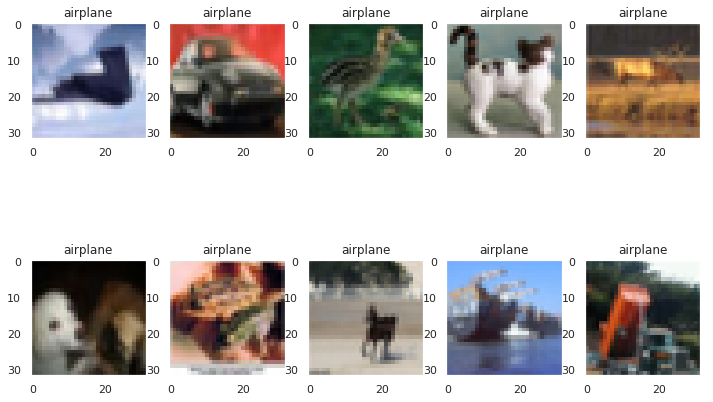

In [5]:
# plot the internet images and their predicted 
plt.figure(figsize=(12, 8))
names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
         "horse", "ship", "truck"]

for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    ax.set_title(names[0])
    plt.grid(False)
    plt.imshow(internet_x[i])#, cmap=pyplot.get_cmap('gray'))


In [6]:
datasets = {"teste": (x_test, y_test),
            "internet": (internet_x, internet_y),
        }

## Avaliar sobre o conjunto de teste e sobre as imagens da internet

In [ ]:
model_files = {"default": "default_model.h5",
          "filters 5": "filters_5_5.h5",
          "extra conv": "extra_conv.h5",
          "dropout conv": "no_dropout_conv.h5"}

results = {"teste": pd.DataFrame(columns=["Modelo", "Acurácia"]),
           "internet": pd.DataFrame(columns=["Modelo", "Acurácia"])}

for model_name, file_name in model_files.items():
    model = keras.models.load_model(file_name)
    for data_name, (x_test, y_test) in datasets.items():
        scores = model.evaluate(x_test, y_test, verbose=1)
        acc = scores[1]
        df = results[data_name]
        df.loc[len(df)] = [model_name, acc]

 6944/10000 [===================>..........] - ETA: 3s

In [ ]:
results["teste"]

In [ ]:
results["internet"]

## Conclusões
Conforme podemos observar pela tabela de acurácia do nosso teste, conforme aumentamos o tamanho dos nossos filtros de 3x3 para 5x5, percebemos um pequeno ganho em acurácia - acreditamos que isso se deve ao fato que com um filtro maior, temos um campo de visão maior sobre a imagem, logo somos capazes de considerar mais o contexto de cada patch, embora isso custo mais poder computacional.

Ao adicionar uma camada de convolução, vemos um aumento ainda maior de acurácia, o que concorda com a literatura moderna sobre a eficácia de criar modelos ainda mais profundos.

Por fim, após realizar essas mudanças incrementalmente e daí retirar a camada de *dropout*, percebemos uma queda de acurácia, mostrando que o *dropout* servia como uma eficaz regularização para o overfitting.

Sobre o nosso conjunto de imagens novas da internet, embora apenas 10 imagens seja um subconjunto muito pequeno para tirar conclusões válidas, percebemos que todas as redes alcançaram no mínimo 60% de acurácia e alguma delas 70%.
